In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('permanent strain modified data.csv')
dataset.head()

,GRADATION,SOURCE,BINDER,DAG,AV,PS avg
0,19.0,17,822.0529,5.58,7.243,2.361937
1,19.0,17,822.0529,5.58,5.982,1.975768
2,19.0,17,822.0529,5.58,4.003,1.643675
3,19.0,17,822.0529,5.58,3.449,1.160868
4,19.0,17,822.0529,5.58,3.262,0.957778


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GRADATION  300 non-null    float64
 1   SOURCE     300 non-null    int64  
 2   BINDER     300 non-null    float64
 3   DAG        300 non-null    float64
 4   AV         300 non-null    float64
 5   PS avg     300 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [5]:
X = dataset.iloc[:, 0:5]
y = dataset.iloc[:,-1].values
X0= dataset.iloc[:,0]
X1= dataset.iloc[:,1]
X2= dataset.iloc[:,2]
X3= dataset.iloc[:,3]


In [6]:
X

,GRADATION,SOURCE,BINDER,DAG,AV
0,19.0,17,822.0529,5.58,7.243
1,19.0,17,822.0529,5.58,5.982
2,19.0,17,822.0529,5.58,4.003
3,19.0,17,822.0529,5.58,3.449
4,19.0,17,822.0529,5.58,3.262
...,...,...,...,...,...
295,26.5,24,3321.7910,5.82,7.038
296,26.5,24,3321.7910,5.82,5.464
297,26.5,24,3321.7910,5.82,4.009
298,26.5,24,3321.7910,5.82,3.529


In [7]:
y

array([2.361937, 1.975768, 1.643675, 1.160868, 0.957778, 2.867196,
       2.256446, 1.880371, 1.669884, 1.371063, 2.039973, 1.520033,
       1.290894, 1.066683, 0.967241, 2.154539, 1.438815, 1.324954,
       1.100154, 0.996378, 3.343896, 2.526482, 1.83723 , 1.781618,
       1.710022, 2.193821, 1.810184, 1.618938, 0.818743, 0.728681,
       2.777252, 2.209929, 1.729914, 1.432724, 1.172993, 1.559175,
       1.077271, 0.780308, 0.739243, 0.677   , 2.068671, 1.654937,
       0.961016, 0.879852, 0.754326, 3.171903, 2.496022, 1.830649,
       1.735048, 1.494575, 1.994298, 1.57692 , 1.372005, 0.932117,
       0.737594, 2.266377, 1.888936, 1.367985, 1.27556 , 0.941767,
       1.607992, 1.188651, 0.830633, 0.749723, 0.665549, 1.852878,
       1.213021, 1.003394, 0.741738, 0.710021, 2.523122, 2.080374,
       1.705641, 1.199487, 1.079538, 2.600469, 2.302335, 1.94565 ,
       1.8858  , 1.130714, 3.540075, 2.65587 , 2.379437, 1.40133 ,
       1.861871, 2.254707, 1.45094 , 1.355439, 1.178966, 1.069

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train

,GRADATION,SOURCE,BINDER,DAG,AV
134,19.0,24,3321.7910,6.48,2.942
145,19.0,24,3321.7910,6.50,7.140
63,19.0,17,3321.7910,5.05,3.791
293,26.5,24,3321.7910,4.75,3.520
285,26.5,24,3321.7910,4.71,7.056
...,...,...,...,...,...
251,26.5,24,1415.1470,5.27,5.341
192,26.5,17,1415.1470,4.90,4.121
117,19.0,24,1415.1470,5.32,4.064
47,19.0,17,1415.1470,6.23,4.224


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)

regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)

In [11]:
folds  = 5
score_calc = 'neg_mean_squared_error'

In [12]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8418610754143001

In [15]:
regressor.predict([[19, 17.  , 389.  ,   5.37,  35.  ]]) 

c:\Users\hp\Desktop\ug Model\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.17])

In [16]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10,20], 'n_estimators' : [70,500], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_rf.fit(X_train, y_train)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(X_test)

0.2876249120321882
{'min_samples_split': 3, 'n_estimators': 500, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)


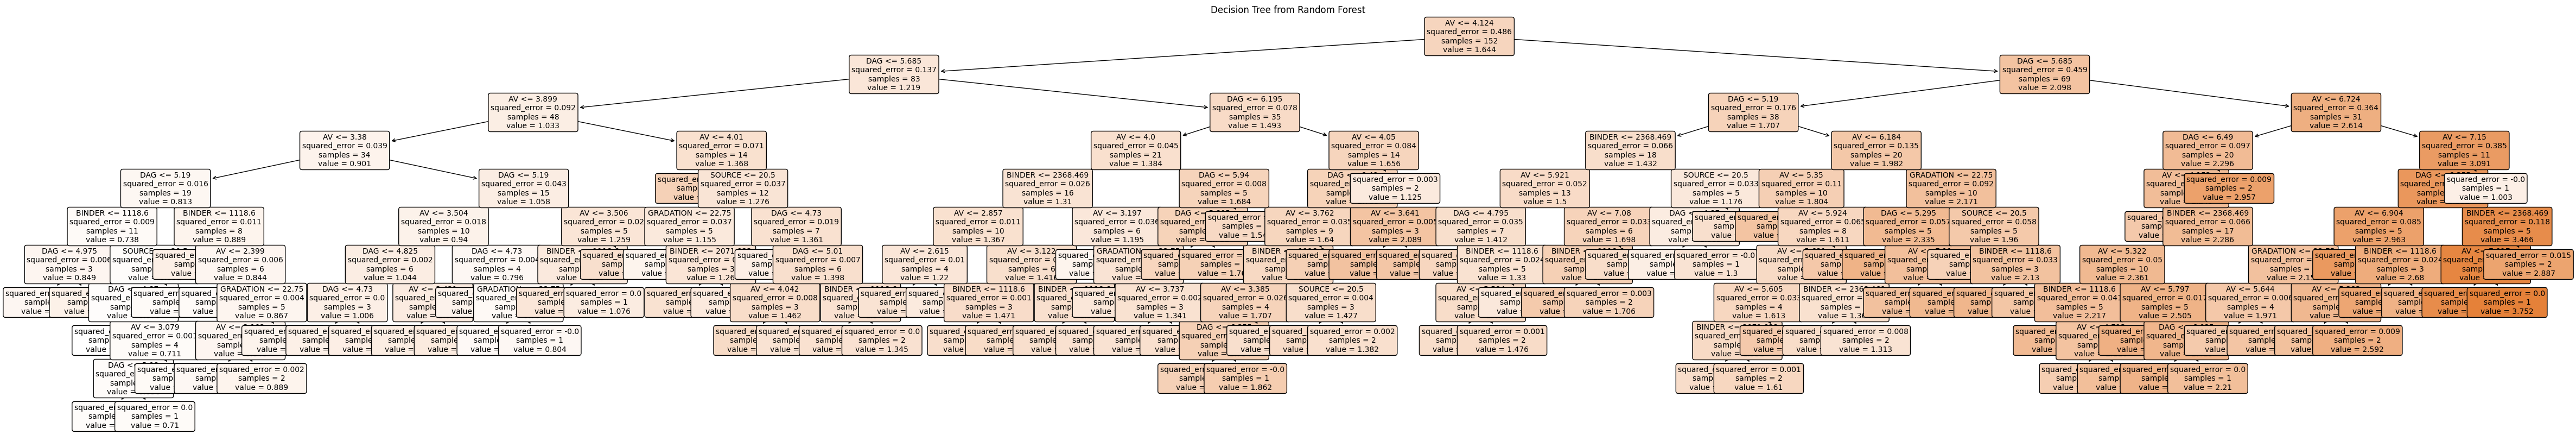

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[40]

plt.figure(figsize=(60, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [18]:
import pickle
with open('model2.pkl', 'wb') as file:
    pickle.dump(regressor,file)